In [1]:
#pip install numpy

In [2]:
#pip install pywavelets

In [3]:
#pip install seaborn

In [4]:
#pip install opencv-python

In [5]:
#pip install matplotlib

In [6]:
#pip install --upgrade pip

In [7]:
#pip install matplotlib

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2

In [9]:
img = cv2.imread("/Users/yuvraj/Desktop/Image_Classification/test_image/untitled-design---2024-01-03t102926445.jpg")
img.shape

(675, 1200, 3)

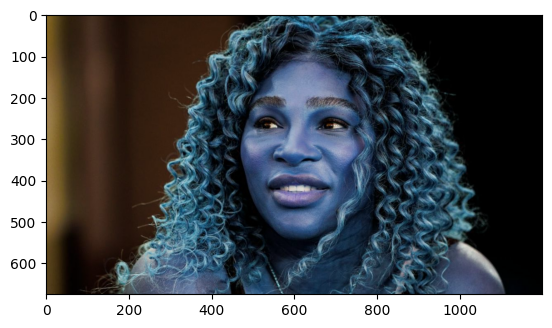

In [10]:
plt.imshow(img)

In [11]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape


(675, 1200)

In [12]:
gray

array([[90, 90, 89, ...,  0,  0,  0],
       [92, 92, 91, ...,  0,  0,  0],
       [93, 93, 92, ...,  0,  0,  0],
       ...,
       [60, 59, 58, ...,  2,  2,  2],
       [60, 59, 58, ...,  2,  2,  2],
       [60, 59, 58, ...,  2,  2,  2]], dtype=uint8)

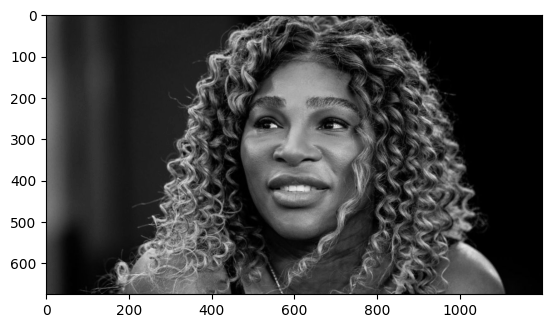

In [13]:
plt.imshow(gray,cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier("/Users/yuvraj/Desktop/Image_Classification/model/opencv/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/Users/yuvraj/Desktop/Image_Classification/model/opencv/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[422, 112, 380, 380]], dtype=int32)

In [15]:
(x,y,w,h)=faces[0]
x,y,w,h

(422, 112, 380, 380)

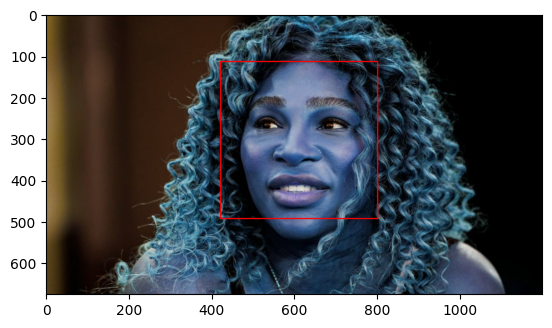

In [16]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

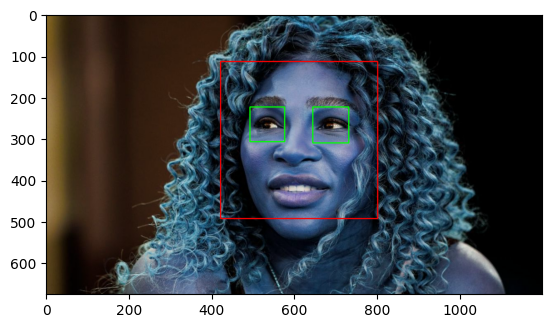

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray= gray[y:y+h,x:x+w]
    roi_colour= face_img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_colour)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_colour,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

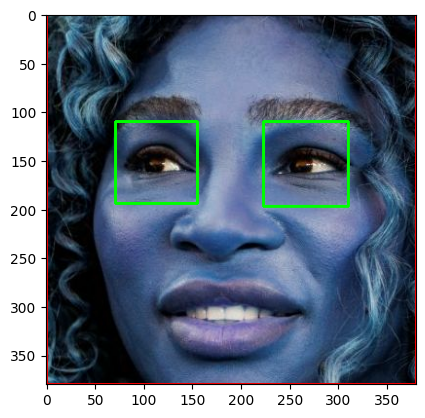

In [18]:
plt.imshow(roi_colour,cmap='gray')

In [19]:
#Function to return cropped image if two eyes are detected

def get_cropped_image_if_two_eyes(image_path):
    print(image_path)
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_colour = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_colour)
        if len(eyes) >= 2:
            return roi_colour

/Users/yuvraj/Desktop/Image_Classification/test_image/untitled-design---2024-01-03t102926445.jpg


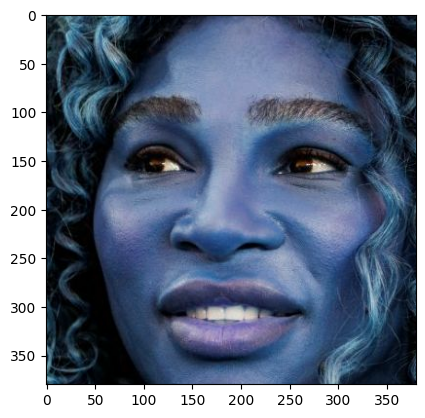

In [20]:
test_crop = get_cropped_image_if_two_eyes("/Users/yuvraj/Desktop/Image_Classification/test_image/untitled-design---2024-01-03t102926445.jpg")
plt.imshow(test_crop)

In [21]:
path_to_data= "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [24]:
#Creating cropped image folder, removing if already exists

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
#Inserting all cropped images to cropped folder, with renaming 

cropped_image_dirs = [] 
celbrity_file_names_dict = {} #dict with celebrity name and cropped image path to be used later 
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celbrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name+str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
        
            cv2.imwrite(cropped_file_path, roi_color)
            celbrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 
        

maria_sharapova
./dataset/maria_sharapova/unnamed (2).jpg
./dataset/maria_sharapova/002831aab808e5488d75de92ec4fb939.jpg
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
./dataset/maria_sharapova/monochrome-maria-sharapova-face-wallpaper-65016-67225-hd-wallpapers.jpg
./dataset/maria_sharapova/Sharapova_at_the_Mutua_Madrid_Open_2015.jpg
./dataset/maria_sharapova/12009b578d60268f36fcd7f2dcf7a04d.jpg
./dataset/maria_sharapova/DmWCxE.jpg
./dataset/maria_sharapova/2015070814363485712044768374.jpg
./dataset/maria_sharapova/Maria-Sharapova-women-singles-event-US-Open-2006.jpg
./dataset/maria_sharapova/maria-sharapova-tim-ferriss-interview_s.webp
./dataset/maria_sharapova/TELEMMGLPICT000226075870_trans_NvBQzQNjv4BqP4pV-m6laGcMQMbuKYgJGTgvk-t9w27mDp57ATZVrwg.webp
./dataset/maria_sharapova/maria-sharapova-praises-roger-federer-for-his-offcourt-life.jpg
./dataset/maria_sharapova/2-70.jpg
./dataset/maria_sharapova/Maria_Sharapova_women-169589.jpg
./dataset/maria_sharapova/ma

In [26]:
#Feature Engineering - Learn about Signal Processing(Iman- Frequency Concept in an image), Fourier Transform(3blue1brown) and Wavelet Transform(used here)

import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray = img
    #DataTYpe conversions
    #COnvert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients 
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [27]:
celbrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova8.png',
  './dataset/cropped/maria_sharapova/maria_sharapova9.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset/cropped/maria_sharapova/maria_sharapova13.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/c

In [28]:
class_dict= {}
count = 0
for celebrity_name in celbrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [29]:
#Generating Wavelet Transformed image and vertically stacking with raw image
#Generating x and y variables for training model

x=[]
y=[]

for celebrity_name, training_files in celbrity_file_names_dict.items():
    for training_image in training_files:
        if img is None:
            continue
        img=cv2.imread(training_image)
        scalled_raw_img= cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har= cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [32]:
#4096 = pixels- 32*32*3+32*32

len(x[0])

4096

In [31]:
#Convert to float for better training 

x = np.array(x).reshape(len(x),4096).astype(float)

In [39]:
pip install scikit_learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 802.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 912.0 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 925.8 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [40]:

from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
#Using SVM to make model

x_train, x_test, y_train, y_test, = train_test_split(x,y,random_state=0)

pipe= Pipeline([('scaler',StandardScaler()), ('svc', SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.723404255319149

In [45]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.67      1.00      0.80        10
           2       0.88      0.64      0.74        11
           3       0.60      0.60      0.60        10
           4       0.83      0.71      0.77         7

    accuracy                           0.72        47
   macro avg       0.74      0.72      0.72        47
weighted avg       0.74      0.72      0.72        47



In [46]:
#Using GridSearchCV to hypertune parameters
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
#Trying which model is best with which parameters
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [64]:
scores =[]
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe , mp['params'], cv=5 , return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.778571,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.621429,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.792857,{'logisticregression__C': 1}


In [65]:
#shows best model with hypertuned parameters
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [69]:
best_estimators['svm'].score(x_test,y_test)

0.723404255319149

In [70]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.723404255319149

In [71]:
best_estimators['random_forest'].score(x_test,y_test)

0.5957446808510638

In [72]:
#Use combination of GridSearchCV and Test Results to determine best model
best_clf = best_estimators['logistic_regression']

In [73]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 7,  0,  0,  2,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  8,  2,  1],
       [ 3,  0,  0,  4,  3],
       [ 0,  1,  0,  1,  5]])

Text(95.72222222222221, 0.5, 'Truth')

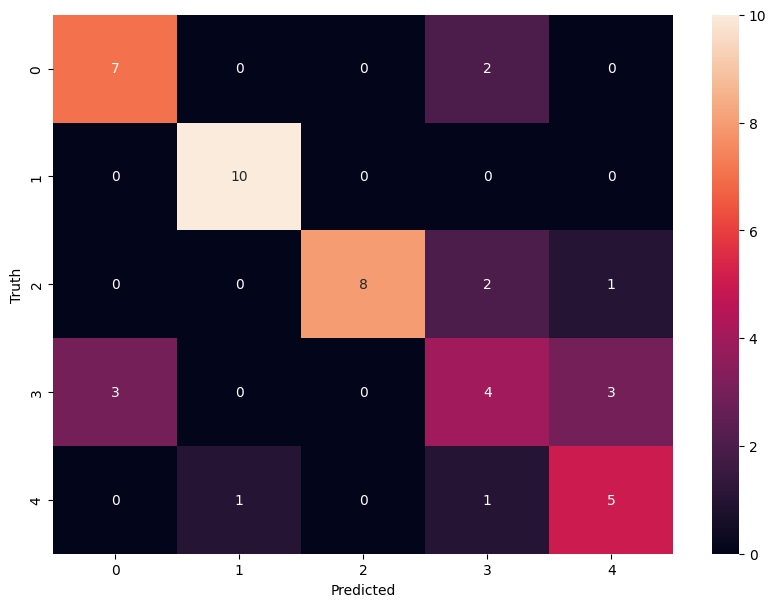

In [74]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
#Save the trained model as a pickle in a file
!pip install joblib 
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [78]:
#save class dict
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))